# Introduction to Data Science 2024

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

### Answers

1. The GDPR sets strict requirements for valid consent in Article 6 (1) a). Consent must be freely given, specific, informed, and unambiguous. This means users must be informed about how their data will be used and must actively agree. If a service you use provides clear information and offers you a real choice to give or withdraw consent, then it likely complies with the GDPR. If it uses pre-ticked boxes or vague language, it may not meet these requirements.

2. According to Article 15 GDPR, as a data subject, you have the right to request access to your personal data. This includes knowing the purposes of processing, categories of data processed, recipients of the data, and storage duration. Services must provide mechanisms, like online forms or email requests, to file these requests. If you receive a response within the one-month period required by Article 12(3), it suggests that the service respects your rights. Lack of a response indicates poor compliance with the regulation.

3. Anonymisation means personal data is processed in a way that it can never be linked back to an individual (Article 4(5)), effectively removing it from the scope of GDPR. Pseudonymisation, on the other hand, still allows re-identification of the individual through additional information, which must be kept separately and securely. Pseudonymised data remains under GDPR protection, unlike anonymised data.

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red).

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n)

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

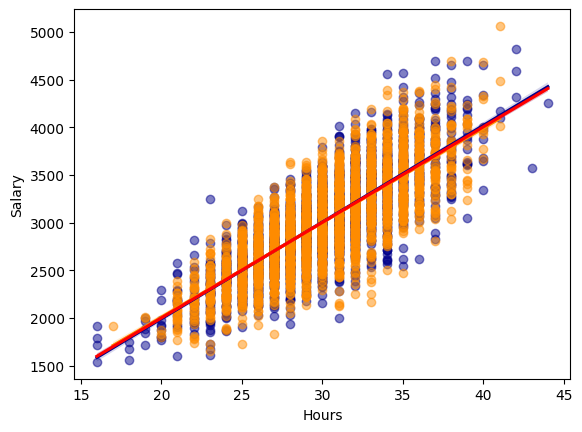

In [3]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [4]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 100.3


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions as comments on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

### Data Simulation

In [5]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)
n_men = sum(gen==0)
n_women = sum(gen==1)

# work hours: difference between men and women
hrs = np.empty(n)
hrs[gen==0] = np.random.binomial(60, 0.55, size=n_men)
hrs[gen==1] = np.random.binomial(60, 0.45, size=n_women)

# salary = hours * (100 + noise) (std.deviation 10)
sal = hrs * (100 + np.random.normal(0, 10, size=n))
# reduced salary for women
sal = sal - 200 * gen

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

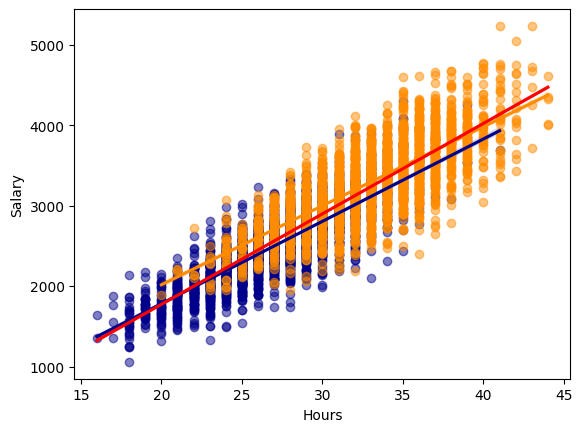

In [6]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

In [7]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100 without learning the 'protected characteristic' (gender)
print("slope: {:.2f}".format(reg.coef_[0][0]))

slope: 112.50


This model is trained using only the hours worked to predict salary. The slope in this case is slightly higher than the expected 100 because the salary is being influenced by gender indirectly, as women have their salaries reduced by 200 units in the data generation process. However, since gender is not included in the model, the model cannot account for this bias directly. The slope ends up reflecting both the contribution of hours worked and some of the unexplained variance (including the gender bias).

In [8]:
# Train linear regression on both gender and hours
X = np.column_stack((gen, hrs))
reg = LinearRegression().fit(X, sal)

print("Coefficients: Gender {:.2f}, Hours {:.2f}".format(reg.coef_[0], reg.coef_[1]))

Coefficients: Gender -194.46, Hours 100.32


Here, the coefficient for gender is -194.46, meaning that being a woman (gen = 1) decreases the salary by this many units, showing the pay gap or direct discrimination. The coefficient for hours is 100.32, which is now very close to the expected value of 100, since the model has accounted for the gender bias separately.

### Conclusion

To detect indirect discrimination, you should include the protected characteristic (gender) in the model. This allows the model to separate the effects of the legitimate features (such as hours worked) from the impact of the protected characteristic. Only by doing this can you see the disparity and accurately measure the extent of discrimination.

## Exercise 3 | Ethics case study

Go to Nitin Sawhney's Miro board: https://miro.com/app/board/uXjVLZORjwk=/

Navigate to the part where it says "Let's dive into some specific cases", and pick one of the six cases to work on (Frames 6-11).

For the case of your choice, answer the four questions that you can find in the boxes below (Frames 13-18).

Don't write your answers on the Miro board but on a **separate document which you can submit to us as PDF**.